In [1]:
from sea_breeze import sea_breeze_filters, load_model_data, sea_breeze_funcs, utils
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from dask.distributed import Client
import xarray as xr
import hvplot.xarray
client = Client()
client

2025-03-14 15:26:46,910 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2025-03-14 15:26:46,913 - distributed.utils - INFO - Reload module schedplugin from .py file
2025-03-14 15:26:46,920 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py


Modifying workers


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-bdw-0039.gadi.nci.org.au/25452/proxy/8787/status,
Dashboard: /node/gadi-cpu-bdw-0039.gadi.nci.org.au/25452/proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39727,Workers: 7
Dashboard: /node/gadi-cpu-bdw-0039.gadi.nci.org.au/25452/proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:43607,Total threads: 1
Dashboard: /node/gadi-cpu-bdw-0039.gadi.nci.org.au/25452/proxy/46443/status,Memory: 0 B
Nanny: tcp://127.0.0.1:39249,


2025-03-14 15:29:42,476 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:29:46,607 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:29:53,145 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:29:58,528 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:29:58,783 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:11,296 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:17,609 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:25,030 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:32,235 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:37,224 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:37,750 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:51,333 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:30:56,806 - distributed.nanny - WARNING - Restarting worker
2025-03-14 15:31:03,846 - distributed.

In [2]:
lat_slice, lon_slice = utils.get_seaus_bounds()
# lon_slice = slice(108,159)
# lat_slice = slice(-45.7,-6.831799)    

In [4]:
# barrar_fc = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/barra_r/Fc_201601010000_201601312300.nc")
# barrac_fc = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/barra_c/Fc_201601010000_201601312300.nc")
# era5_fc = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/era5/Fc_201601010000_201601312300.nc")
#aus2200_fc = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/aus2200/Fc_mjo-elnino_201601010000_201601312300.nc")

In [5]:
# era5_sbi = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/era5/sbi_201601010000_201601312300.nc")
# aus2200_sbi = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/aus2200/sbi_mjo-elnino_201601010100_201601312300.nc")

In [6]:
path = "/g/data/ng72/ab4502/"
fc_field_path = path + "sea_breeze_detection/aus2200_smooth_s4/Fc_mjo-elnino_201601010000_201601312300.zarr"
f_field_path = path + "sea_breeze_detection/aus2200_smooth_s4/F_mjo-elnino_201601010000_201601312300.zarr"
sbi_path = path+ "sea_breeze_detection/aus2200_smooth_s4/sbi_mjo-elnino_201601010100_201601312300.zarr"
fuzzy_path = path+ "sea_breeze_detection/aus2200_smooth_s4/fuzzy_mjo-elnino_201601010000_201601312300.zarr"

fc_mask_path = path + "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_Fc_201601010000_201601312300.zarr"
f_mask_path = path + "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_F_201601010000_201601312300.zarr"
sbi_mask_path = path+ "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_sbi_201601010000_201601312300.zarr"
fuzzy_mask_path = path+ "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_fuzzy_201601010000_201601312300.zarr"

t = "2016-01-08 04:00"

aus2200_Fc = xr.open_dataset(
    fc_field_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).Fc.sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_F = xr.open_dataset(
    f_field_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).F.sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_sbi = xr.open_zarr(
    sbi_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sbi.sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_fuzzy = xr.open_zarr(
    fuzzy_path,chunks={"time":1,"lat":-1,"lon":-1}
    )["__xarray_dataarray_variable__"].sel(lat=lat_slice,lon=lon_slice,time=t)

aus2200_Fc_mask = xr.open_dataset(
    fc_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_F_mask = xr.open_dataset(
    f_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_sbi_mask = xr.open_dataset(
    sbi_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_fuzzy_mask = xr.open_dataset(
    fuzzy_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)

# fc_field_path = path + "sea_breeze_detection/era5/Fc_201601010000_201601312300.nc"
# f_field_path = path + "sea_breeze_detection/era5/F_201601010000_201601312300.nc"
# sbi_path = path+ "sea_breeze_detection/era5/sbi_201601010000_201601312300.nc"
# fuzzy_path = path+ "sea_breeze_detection/era5/fuzzy_201601010000_201601312300.nc"

# fc_mask_path = path + "sea_breeze_detection/era5/filtered_mask_Fc_201601010000_201601312300.nc"
# f_mask_path = path + "sea_breeze_detection/era5/filtered_mask_F_201601010000_201601312300.nc"
# sbi_mask_path = path+ "sea_breeze_detection/era5/filtered_mask_sbi_201601010000_201601312300.nc"
# fuzzy_mask_path = path+ "sea_breeze_detection/era5/filtered_mask_fuzzy_mean_201601010000_201601312300.nc"

# era5_Fc = xr.open_dataset(
#     fc_field_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).Fc.sel(lat=lat_slice,lon=lon_slice,time=t)
# era5_F = xr.open_dataset(
#     f_field_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).F.sel(lat=lat_slice,lon=lon_slice,time=t)
# era5_sbi = xr.open_dataset(
#     sbi_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).sbi.sel(lat=lat_slice,lon=lon_slice,time=t)
# era5_fuzzy = xr.open_dataset(
#     fuzzy_path,chunks={"time":1,"lat":-1,"lon":-1}
#     )["__xarray_dataarray_variable__"].sel(lat=lat_slice,lon=lon_slice,time=t)

# era5_Fc_mask = xr.open_dataset(
#     fc_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).sel(lat=lat_slice,lon=lon_slice,time=t)
# era5_F_mask = xr.open_dataset(
#     f_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).sel(lat=lat_slice,lon=lon_slice,time=t)
# era5_sbi_mask = xr.open_dataset(
#     sbi_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).sel(lat=lat_slice,lon=lon_slice,time=t)
# era5_fuzzy_mask = xr.open_dataset(
#     fuzzy_mask_path,chunks={"time":1,"lat":-1,"lon":-1}
#     ).sel(lat=lat_slice,lon=lon_slice,time=t)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/si

In [7]:
# plt.figure(figsize=[18,6])

# ax=plt.subplot(2,4,1,projection=ccrs.PlateCarree())
# era5_sbi.plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Sea Breeze Index",size=16)

# ax=plt.subplot(2,4,2,projection=ccrs.PlateCarree())
# era5_F.plot(vmin=-4,vmax=4,cmap="RdBu")
# ax.coastlines()
# ax.set_title("F",size=16)

# ax=plt.subplot(2,4,3,projection=ccrs.PlateCarree())
# era5_Fc.plot(vmin=-4,vmax=4,cmap="RdBu")
# ax.coastlines()
# ax.set_title("Fc",size=16)

# ax=plt.subplot(2,4,4,projection=ccrs.PlateCarree())
# era5_fuzzy.plot(vmin=0,vmax=0.5,cmap="Blues")
# ax.coastlines()
# ax.set_title("Fuzzy logic algorithm",size=16)

# ax=plt.subplot(2,4,5,projection=ccrs.PlateCarree())
# aus2200_sbi.plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,6,projection=ccrs.PlateCarree())
# aus2200_F.plot(vmin=-200,vmax=200,cmap="RdBu")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,7,projection=ccrs.PlateCarree())
# aus2200_Fc.plot(vmin=-200,vmax=200,cmap="RdBu")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,8,projection=ccrs.PlateCarree())
# aus2200_fuzzy.plot(vmin=0,vmax=0.5,cmap="Blues")
# ax.coastlines()
# ax.set_title("")



# plt.figure(figsize=[18,6])

# ax=plt.subplot(2,4,1,projection=ccrs.PlateCarree())
# (era5_sbi_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Sea Breeze Index",size=16)

# ax=plt.subplot(2,4,2,projection=ccrs.PlateCarree())
# (era5_F_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("F",size=16)

# ax=plt.subplot(2,4,3,projection=ccrs.PlateCarree())
# (era5_Fc_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Fc",size=16)

# ax=plt.subplot(2,4,4,projection=ccrs.PlateCarree())
# (era5_fuzzy_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Fuzzy logic algorithm",size=16)

# ax=plt.subplot(2,4,5,projection=ccrs.PlateCarree())
# (aus2200_sbi_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,6,projection=ccrs.PlateCarree())
# (aus2200_F_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,7,projection=ccrs.PlateCarree())
# (aus2200_Fc_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,8,projection=ccrs.PlateCarree())
# (aus2200_fuzzy_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")


# plt.figure(figsize=[18,6])

# ax=plt.subplot(2,4,1,projection=ccrs.PlateCarree())
# (era5_sbi_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Sea Breeze Index",size=16)

# ax=plt.subplot(2,4,2,projection=ccrs.PlateCarree())
# (era5_F_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("F",size=16)

# ax=plt.subplot(2,4,3,projection=ccrs.PlateCarree())
# (era5_Fc_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Fc",size=16)

# ax=plt.subplot(2,4,4,projection=ccrs.PlateCarree())
# (era5_fuzzy_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("Fuzzy logic algorithm",size=16)

# ax=plt.subplot(2,4,5,projection=ccrs.PlateCarree())
# (aus2200_sbi_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,6,projection=ccrs.PlateCarree())
# (aus2200_F_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,7,projection=ccrs.PlateCarree())
# (aus2200_Fc_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")

# ax=plt.subplot(2,4,8,projection=ccrs.PlateCarree())
# (aus2200_fuzzy_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
# ax.coastlines()
# ax.set_title("")




# # ax=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
# # (sbi_mask.mask).plot(vmin=0,vmax=1)
# # ax.coastlines()

# # ax=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
# # (F_mask.mask).plot(vmin=0,vmax=1)
# # ax.coastlines()

# # ax=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
# # (Fc_mask.mask).plot(vmin=0,vmax=1)
# # ax.coastlines()

# # ax=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
# # (fuzzy_mask.mask).plot(vmin=0,vmax=1)
# # ax.coastlines()

In [8]:
path = "/g/data/ng72/ab4502/"
fc_mask2_path = path + "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_no_hourly_change_Fc_201601060000_201601122300.zarr"
f_mask2_path = path + "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_no_hourly_change_F_201601060000_201601122300.zarr"
sbi_mask2_path = path + "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_no_hourly_change_sbi_201601060000_201601122300.zarr"
fuzzy_mask2_path = path + "sea_breeze_detection/aus2200_smooth_s4/filtered_mask_no_hourly_change_fuzzy_201601060000_201601122300.zarr"


aus2200_Fc_mask2 = xr.open_dataset(
    fc_mask2_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_F_mask2 = xr.open_dataset(
    f_mask2_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_sbi_mask2 = xr.open_dataset(
    sbi_mask2_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)
aus2200_fuzzy_mask2 = xr.open_dataset(
    fuzzy_mask2_path,chunks={"time":1,"lat":-1,"lon":-1}
    ).sel(lat=lat_slice,lon=lon_slice,time=t)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/si

Text(0.5, 1.0, '')

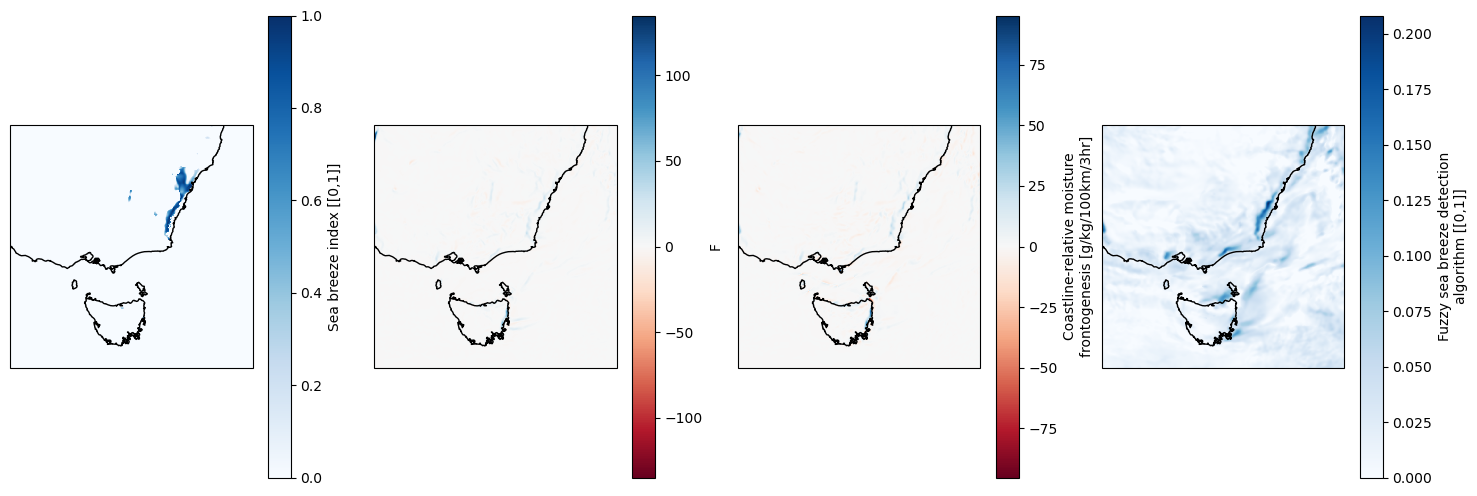

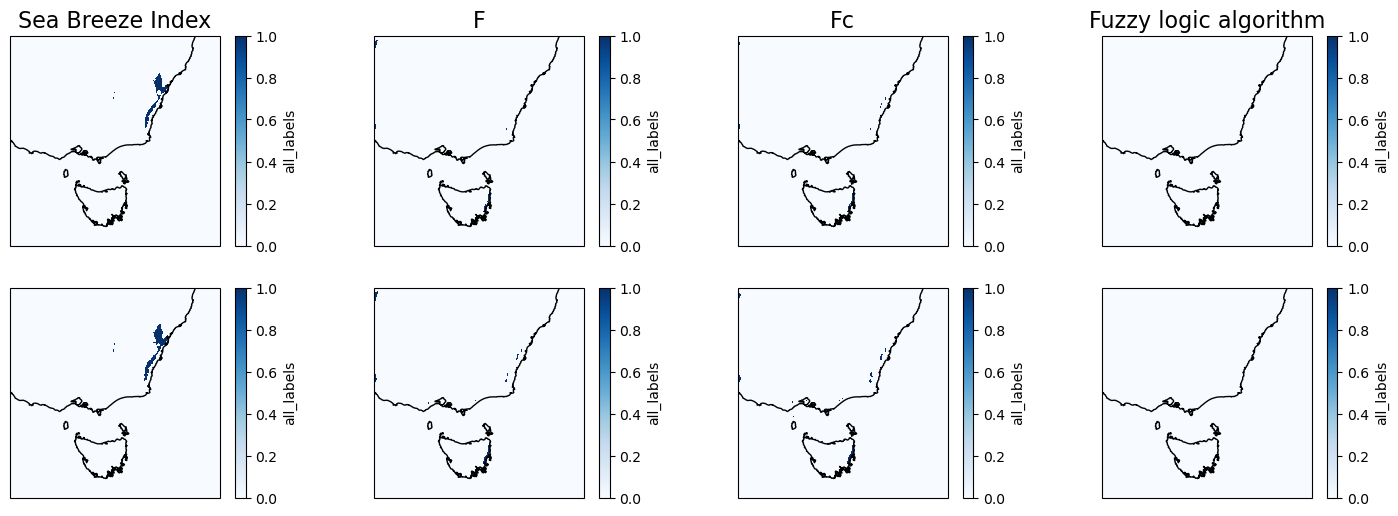

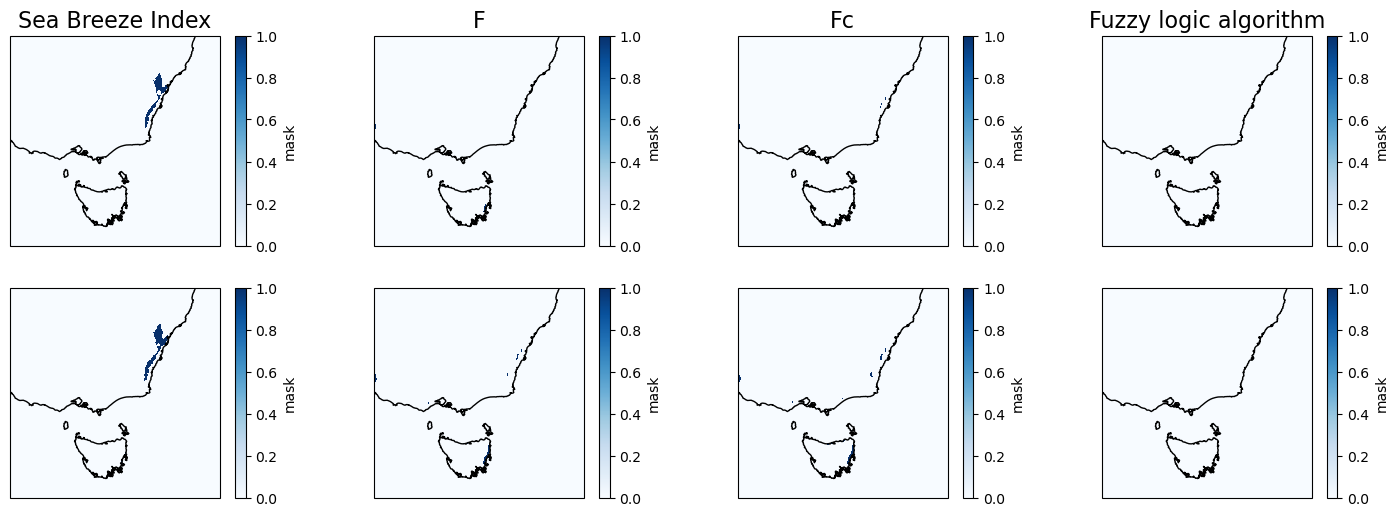

In [9]:
plt.figure(figsize=[18,6])

ax=plt.subplot(1,4,1,projection=ccrs.PlateCarree())
aus2200_sbi.plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(1,4,2,projection=ccrs.PlateCarree())
aus2200_F.plot(cmap="RdBu")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(1,4,3,projection=ccrs.PlateCarree())
aus2200_Fc.plot(cmap="RdBu")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(1,4,4,projection=ccrs.PlateCarree())
aus2200_fuzzy.plot(cmap="Blues")
ax.coastlines()
ax.set_title("")



plt.figure(figsize=[18,6])

ax=plt.subplot(2,4,1,projection=ccrs.PlateCarree())
(aus2200_sbi_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("Sea Breeze Index",size=16)

ax=plt.subplot(2,4,2,projection=ccrs.PlateCarree())
(aus2200_F_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("F",size=16)

ax=plt.subplot(2,4,3,projection=ccrs.PlateCarree())
(aus2200_Fc_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("Fc",size=16)

ax=plt.subplot(2,4,4,projection=ccrs.PlateCarree())
(aus2200_fuzzy_mask.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("Fuzzy logic algorithm",size=16)

ax=plt.subplot(2,4,5,projection=ccrs.PlateCarree())
(aus2200_sbi_mask2.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(2,4,6,projection=ccrs.PlateCarree())
(aus2200_F_mask2.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(2,4,7,projection=ccrs.PlateCarree())
(aus2200_Fc_mask2.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(2,4,8,projection=ccrs.PlateCarree())
(aus2200_fuzzy_mask2.all_labels>=1).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")


plt.figure(figsize=[18,6])

ax=plt.subplot(2,4,1,projection=ccrs.PlateCarree())
(aus2200_sbi_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("Sea Breeze Index",size=16)

ax=plt.subplot(2,4,2,projection=ccrs.PlateCarree())
(aus2200_F_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("F",size=16)

ax=plt.subplot(2,4,3,projection=ccrs.PlateCarree())
(aus2200_Fc_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("Fc",size=16)

ax=plt.subplot(2,4,4,projection=ccrs.PlateCarree())
(aus2200_fuzzy_mask.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("Fuzzy logic algorithm",size=16)

ax=plt.subplot(2,4,5,projection=ccrs.PlateCarree())
(aus2200_sbi_mask2.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(2,4,6,projection=ccrs.PlateCarree())
(aus2200_F_mask2.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(2,4,7,projection=ccrs.PlateCarree())
(aus2200_Fc_mask2.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

ax=plt.subplot(2,4,8,projection=ccrs.PlateCarree())
(aus2200_fuzzy_mask2.mask).plot(vmin=0,vmax=1,cmap="Blues")
ax.coastlines()
ax.set_title("")

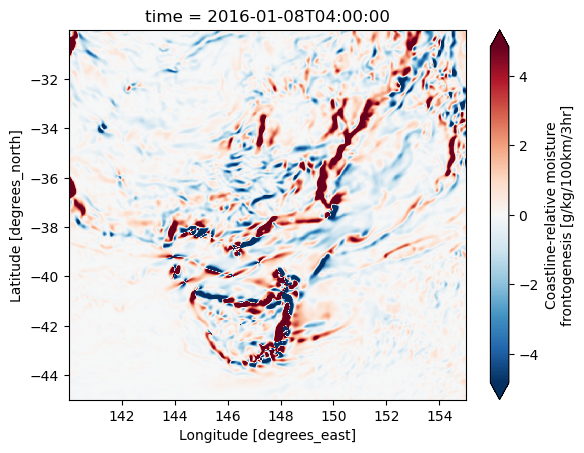

In [11]:
aus2200_Fc.plot(robust=True)

In [33]:
aus2200_Fc_mask2.mask.threshold

[15.660982045466232]